In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df=pd.read_excel("/home/user/Desktop/env2/VAR/Rates_value_adjusted.xlsx")
df=df[["Date","LIBOR ON","SOFR Rate","SONIA DAILY RATE","TIIE DAILY AVG RATES"]]
df.tail()

,Date,LIBOR ON,SOFR Rate,SONIA DAILY RATE,TIIE DAILY AVG RATES
1339,31.03.2021,0.07288,0.01,0.08998,4.20
1340,01.04.2021,0.07475,0.01,0.08112,NaN
1341,05.04.2021,0.07475,0.01,NaN,4.06
1342,06.04.2021,0.07788,0.01,0.08545,4.03
1343,07.04.2021,0.07625,0.01,0.08367,4.01


In [3]:
df.index=df["Date"]


In [4]:
df.drop("Date",axis=1,inplace=True)

In [5]:
df.tail()

,LIBOR ON,SOFR Rate,SONIA DAILY RATE,TIIE DAILY AVG RATES
Date,,,,
31.03.2021,0.07288,0.01,0.08998,4.20
01.04.2021,0.07475,0.01,0.08112,NaN
05.04.2021,0.07475,0.01,NaN,4.06
06.04.2021,0.07788,0.01,0.08545,4.03
07.04.2021,0.07625,0.01,0.08367,4.01


In [6]:
df.ffill(axis=0,inplace=True)

In [7]:
def normalize(df,col):
    df=df.copy()
    return (df[col]-df[col].min())/(df[col].max()-df[col].min())


def MACD(df,slow=26,fast=12,signal=9,colname=None):
    if colname==None:
        print("colnam")
        df=df.copy()
        df["ema_slow"]=df["ON"].ewm(slow).mean()
        df["ema_fast"]=df["ON"].ewm(fast).mean()
        df["macd"]=df["ema_fast"]-df["ema_slow"]
        df["signal"]=df["macd"].ewm(signal).mean()
        df.dropna(inplace=True)
    else:
        df=df.copy()
        df["ema_slow"]=df[colname].ewm(slow).mean()
        df["ema_fast"]=df[colname].ewm(fast).mean()
        df["macd"]=df["ema_fast"]-df["ema_slow"]
        df["signal"]=df["macd"].ewm(signal).mean()
        df.dropna(inplace=True)
    return df

In [8]:
df["libor_norm"]=normalize(df,"LIBOR ON")
df["SOFR_norm"]=normalize(df,"SOFR Rate")
df["SONIA_norm"]=normalize(df,"SONIA DAILY RATE")
df["TIIE_norm"]=normalize(df,"TIIE DAILY AVG RATES")

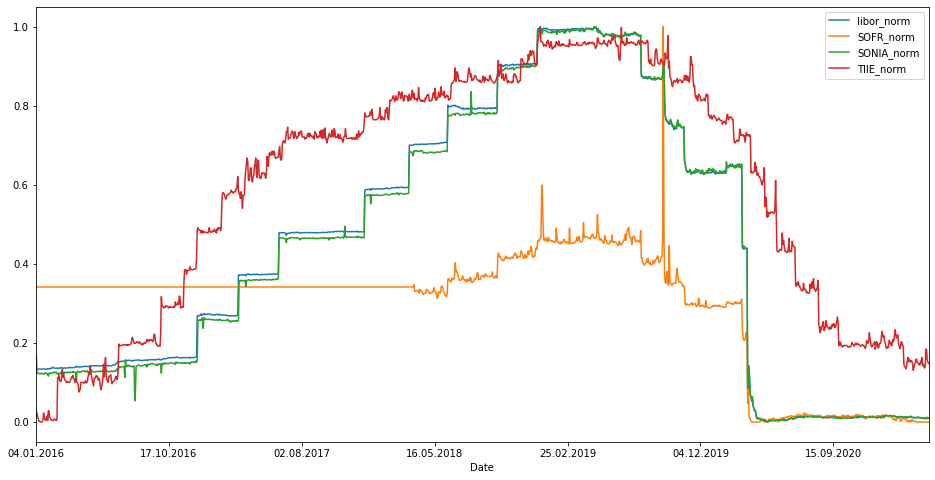

In [9]:
plt.figure(figsize=(16,8))
df["libor_norm"].plot(legend=True)
df["SOFR_norm"].plot(legend=True)
df["SONIA_norm"].plot(legend=True)
df["TIIE_norm"].plot(legend=True)

In [10]:
df["LIBOR_SIGNAL"]=MACD(df,colname="libor_norm")["signal"]
df["SOFR_SIGNAL"]=MACD(df,colname="SOFR_norm")["signal"]
df["SONIA_SIGNAL"]=MACD(df,colname="SONIA_norm")["signal"]
df["TIIE_SIGNAL"]=MACD(df,colname="TIIE_norm")["signal"]
df["ZERO"]=0

Text(0.5, 1.0, 'SIGNAL LINE PLOT USING MACD FOR OVERNIGHT RATES')

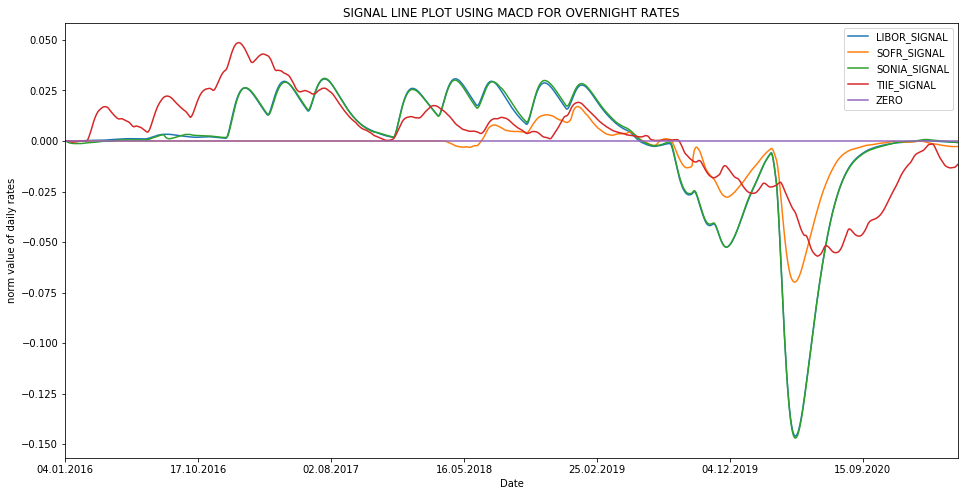

In [11]:
plt.figure(figsize=(16,8))

df["LIBOR_SIGNAL"].plot(legend=True)
df["SOFR_SIGNAL"].plot(legend=True)
df["SONIA_SIGNAL"].plot(legend=True)
df["TIIE_SIGNAL"].plot(legend=True)
df["ZERO"].plot(legend=True)
plt.ylabel("norm value of daily rates")
plt.title("SIGNAL LINE PLOT USING MACD FOR OVERNIGHT RATES")

In [12]:
def variance(data):
# Number of observations
    n = len(data)
    # Mean of the data
    mean = sum(data) / n
    # Square deviations
    deviations = [(x - mean) ** 2 for x in data]
    # Variance
    variance = sum(deviations) / n
    return variance,math.sqrt(variance)

In [24]:
variance(df["SONIA DAILY RATE"])

(0.676140076670104, 0.8222773721014728)

In [14]:
df["%changeLIBOR"]=df["LIBOR ON"].pct_change().rolling(20).std()*(252**0.5)
df["%changeSOFR"]=df["SOFR Rate"].pct_change().rolling(20).std()*(252**0.5)
df["%changeSONIA"]=df["SONIA DAILY RATE"].pct_change().rolling(20).std()*(252**0.5)
df["%changeTIIA"]=df["TIIE DAILY AVG RATES"].pct_change().rolling(20).std()*(252**0.5)

In [15]:
df["%changeLIBOR"]=normalize(df,"%changeLIBOR")
df["%changeSOFR"]=normalize(df,"%changeSOFR")
df["%changeSONIA"]=normalize(df,"%changeSONIA")
df["%changeTIIA"]=normalize(df,"%changeTIIA")

Text(0.5, 1.0, 'PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES OF LIBOR VS SOFR')

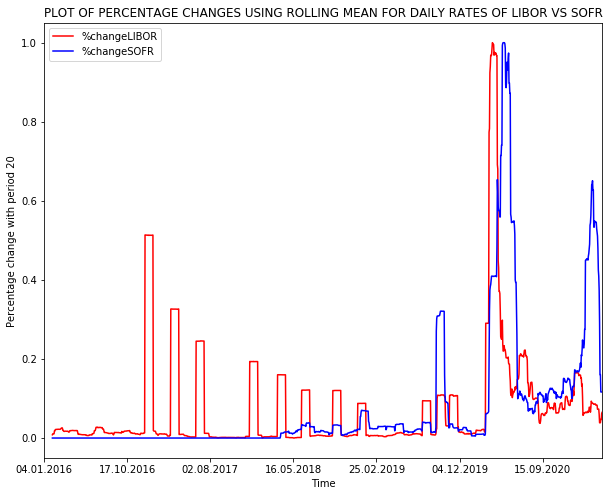

In [25]:
plt.figure(figsize=(10,8))
df["%changeLIBOR"].plot(color='red',legend=True)
df["%changeSOFR"].plot(color='blue',legend=True)
plt.ylabel("Percentage change with period 20")
plt.xlabel("Time")
plt.title("PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES OF LIBOR VS SOFR")

Text(0.5, 1.0, 'PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES OF SONIA VS SOFR')

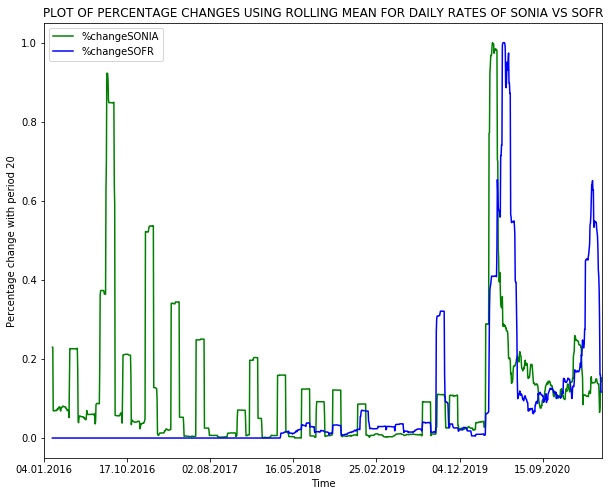

In [27]:
plt.figure(figsize=(10,8))
df["%changeSONIA"].plot(color='green',legend=True)
df["%changeSOFR"].plot(color='blue',legend=True)
plt.ylabel("Percentage change with period 20")
plt.xlabel("Time")
plt.title("PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES OF SONIA VS SOFR")

Text(0.5, 1.0, 'PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES OF TIIE VS SOFR')

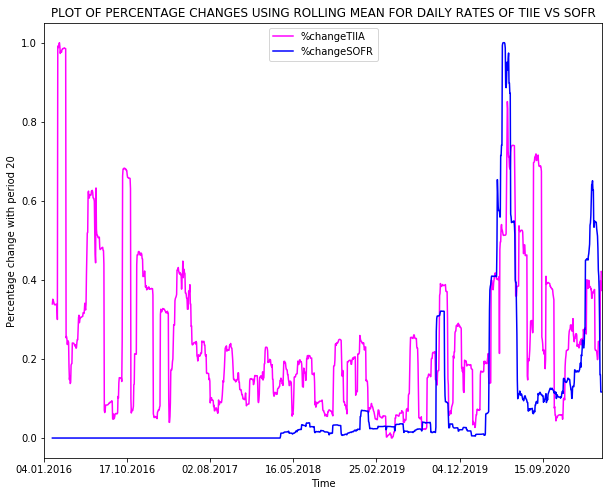

In [30]:
plt.figure(figsize=(10,8))
df["%changeTIIA"].plot(color='magenta',legend=True)
df["%changeSOFR"].plot(color='blue',legend=True)
plt.ylabel("Percentage change with period 20")
plt.xlabel("Time")
plt.title("PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES OF TIIE VS SOFR")

Text(0.5, 1.0, 'PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES OF LIBOR VS SONIA')

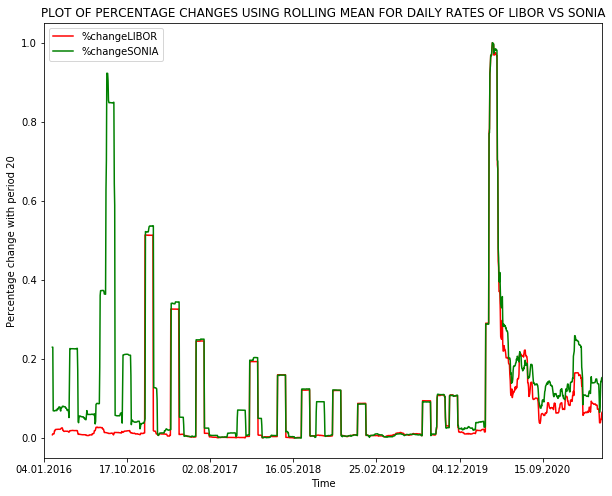

In [31]:
plt.figure(figsize=(10,8))

df["%changeLIBOR"].plot(color='red',legend=True)
df["%changeSONIA"].plot(color='green',legend=True)
plt.ylabel("Percentage change with period 20")
plt.xlabel("Time")
plt.title("PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES OF LIBOR VS SONIA")

Text(0.5, 1.0, 'PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES OF TIIE VS SONIA')

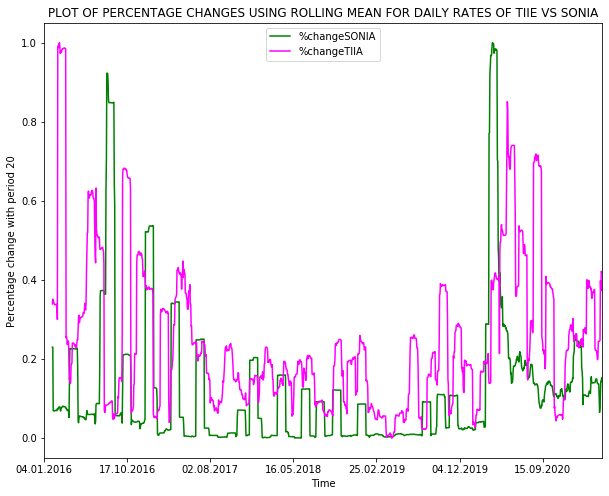

In [32]:
plt.figure(figsize=(10,8))
df["%changeSONIA"].plot(color='green',legend=True)
df["%changeTIIA"].plot(color='magenta',legend=True)
plt.ylabel("Percentage change with period 20")
plt.xlabel("Time")
plt.title("PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES OF TIIE VS SONIA")

Text(0.5, 1.0, 'PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES OF LIBOR VS TIIE')

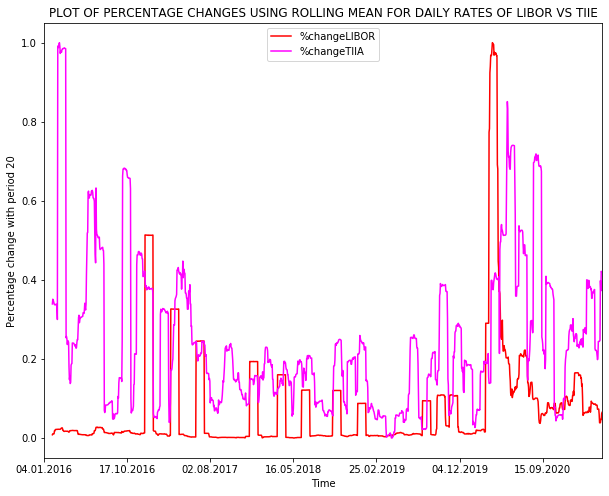

In [33]:
plt.figure(figsize=(10,8))
df["%changeLIBOR"].plot(color='red',legend=True)
df["%changeTIIA"].plot(color='magenta',legend=True)
plt.ylabel("Percentage change with period 20")
plt.xlabel("Time")
plt.title("PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES OF LIBOR VS TIIE")

Text(0.5, 1.0, 'PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES')

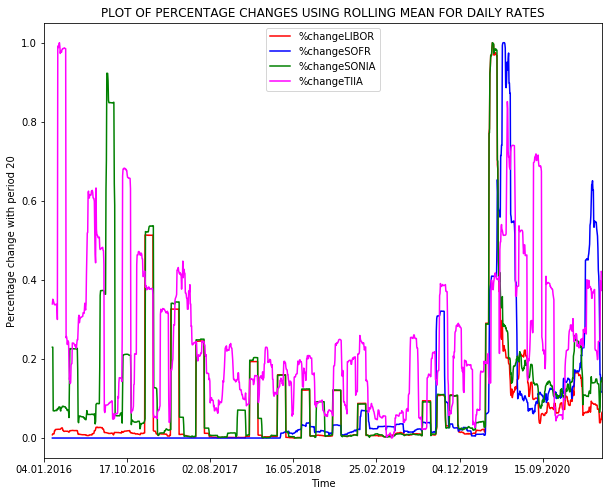

In [34]:
plt.figure(figsize=(10,8))
df["%changeLIBOR"].plot(color='red',legend=True)
df["%changeSOFR"].plot(color='blue',legend=True)
df["%changeSONIA"].plot(color='green',legend=True)
df["%changeTIIA"].plot(color='magenta',legend=True)
plt.ylabel("Percentage change with period 20")
plt.xlabel("Time")
plt.title("PLOT OF PERCENTAGE CHANGES USING ROLLING MEAN FOR DAILY RATES")